# Loading dependencies

In [1]:
import os
import re   # For regular expressions
# BeautifulSoup is used to parse the HTML
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB # naives bayes
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC # support vector classifier
from sklearn.neighbors import KNeighborsClassifier # k nearest neighbors


from sklearn.model_selection import train_test_split


## Loading Dataset

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

# taking only 10000 samples from the dataset
df = df.sample(10000, random_state=42)
df.reset_index(drop=True, inplace=True)

df.head()

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative


In [5]:
# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'], test_size=0.2, random_state=4)

In [6]:
# concatenate the two dataframes
df = pd.concat([X_train,y_train],axis=1)

df.reset_index(drop=True, inplace=True)

print("Shape of Dataset: ",df.shape)

#removing the index column from the dataframe
df.reset_index(inplace=True,drop=True)

df.head()

Shape of Dataset:  (8000, 2)


,review,sentiment
0,I got Mirror Mirror mainly because Yvonne De C...,negative
1,"The main point of the movie, IMO, is the fact ...",positive
2,"This is a good film, no doubt, but with some o...",positive
3,PLEASE?! If this is about technology and what ...,negative
4,"A noble effort, I guess, but ultimately a poor...",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

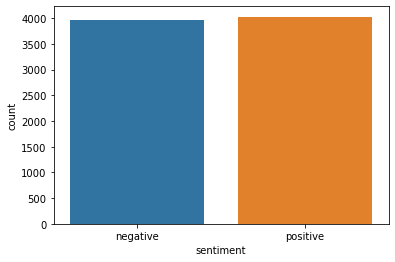

In [7]:
sns.countplot(x='sentiment',data=df)
# we see we have reviews in equal numbers i.e 4000 positive and 4000 negative reviews

In [8]:
df['review'][0]
# data have html tags in them, so we need to remove them

'I got Mirror Mirror mainly because Yvonne De Carlo was in it (I thought she was great in American Gothic) but sadly she didn\'t have a very big role in this film. It starts off OK and the pace moves along nicely...but by the end it starts getting a bit tedious and dull. That\'s not to say that this is a boring film, but it\'s just very average and nothing spectacular. I didn\'t like the "posession" side of it and there were no decent gore scenes. Plus the \'main\' story was very confusing and the ending doesn\'t make much sense at all. I did however like the story surrounding the Gothic girl and how she got revenge on her tormentors.<br /><br />I wouldn\'t particularly recommend Mirror Mirror to horror fans - it\'s nothing to wet yourself over.'

# Data Cleaning & Preprocessing

## Text Cleaning
    1. Remove html tags
    2. Remove special character
    3. Converting everything to lower case
    4. Remove stopwords
    5. Further removing common words
    6. Stemming

In [9]:
def review_to_word(review, remove_stopwords=False):
    # Function to convert raw review to string of words,
    # optionally removing stop words.  
    # Returns string of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    
    # 2. Remove non-letters (all punctuation, and all whitespace)
    review_text = re.sub("'","",review_text)
    review_text = re.sub("[^a-zA-Z]"," ", review_text)

    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    # 5. Return a string of words
    return(" ".join(words))


# without stopwords
clean_review = review_to_word(df['review'][0])
print(clean_review)

i got mirror mirror mainly because yvonne de carlo was in it i thought she was great in american gothic but sadly she didnt have a very big role in this film it starts off ok and the pace moves along nicely but by the end it starts getting a bit tedious and dull thats not to say that this is a boring film but its just very average and nothing spectacular i didnt like the posession side of it and there were no decent gore scenes plus the main story was very confusing and the ending doesnt make much sense at all i did however like the story surrounding the gothic girl and how she got revenge on her tormentors i wouldnt particularly recommend mirror mirror to horror fans its nothing to wet yourself over


In [10]:
# with stopwords
clean_review = review_to_word(df['review'][0], remove_stopwords=True)
print(clean_review)

got mirror mirror mainly yvonne de carlo thought great american gothic sadly didnt big role film starts ok pace moves along nicely end starts getting bit tedious dull thats say boring film average nothing spectacular didnt like posession side decent gore scenes plus main story confusing ending doesnt make much sense however like story surrounding gothic girl got revenge tormentors wouldnt particularly recommend mirror mirror horror fans nothing wet


In [11]:
# get number of reviews 
num_reviews = df.shape[0]

#Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# looping over each review 
for i in range(0, num_reviews):
    # give a progress bar
    if((i+1)%1000 == 0):
        print("Review %d of %d\n" % (i+1, num_reviews))
    
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append(review_to_word(df['review'][i], remove_stopwords=True))


Review 1000 of 8000
Review 2000 of 8000
Review 3000 of 8000
Review 4000 of 8000
Review 5000 of 8000
Review 6000 of 8000
Review 7000 of 8000
Review 8000 of 8000


In [12]:
def remove_words(review):
    review = re.sub(" film "," ",review)
    review = re.sub(" movie "," ",review)
    review = re.sub(" people "," ", review)
    review = re.sub(" today "," ", review)
    
    review = re.sub(" yeah ","", review)
    review = re.sub(" approach ","",review)
    review = re.sub(" s "," ", review)
    review = re.sub(" t "," ", review)
    review = re.sub(" u "," ", review)

    review = re.sub("  "," ", review)

    return review

# nn = remove_words(clean_train_reviews[0])
clean_train_review = []
for i in range(len(clean_train_reviews)):
    clean_train_review.append(remove_words(clean_train_reviews[i]))

clean_train_review[0]

'got mirror mirror mainly yvonne de carlo thought great american gothic sadly didnt big role starts ok pace moves along nicely end starts getting bit tedious dull thats say boring average nothing spectacular didnt like posession side decent gore scenes plus main story confusing ending doesnt make much sense however like story surrounding gothic girl got revenge tormentors wouldnt particularly recommend mirror mirror horror fans nothing wet'

In [13]:
lm = WordNetLemmatizer()

def text_transformation(reviews):
    corpus = []
    count = 0
    for review in reviews:
        count+=1
        if(count%1000 == 0):
            print(" %d done \n" % count)
        n_review = review.split(' ')
        n_review = [lm.lemmatize(word) for word in n_review if word not in set(stopwords.words('english'))]
        corpus.append(" ".join(n_review))
    return corpus

# lemma = text_transformation(clean_train_review)
import pickle
# pickle.dump(lemma, open('lemma.sav',"wb"))
# loading lemmatiszed data
lemma = pickle.load(open('lemma.sav', 'rb'))
lemma[0]

'got mirror mirror mainly yvonne de carlo thought great american gothic sadly didnt big role start ok pace move along nicely end start getting bit tedious dull thats say boring average nothing spectacular didnt like posession side decent gore scene plus main story confusing ending make much sense however like story surrounding gothic girl got revenge tormentor particularly recommend mirror mirror horror fan nothing wet'

In [14]:
# creating bag of words model
print("Creating the bag of words..\n")

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.

vectorizer = CountVectorizer(   analyzer = "word",
                                tokenizer=None, 
                                preprocessor=None,
                                stop_words=None,
                                max_features=7000,
                                ngram_range=(1,2),
                                max_df=0.9,
                                min_df=0.0
                            )

train_data_features = vectorizer.fit_transform(lemma)

train_data_features = train_data_features.toarray()

Creating the bag of words..



In [15]:
print("Data Features : ",train_data_features.shape)

Data Features :  (8000, 7000)


In [16]:
# looking into the bag of words/features

# import random
from random import sample

vocab = vectorizer.get_feature_names()
# 10 samples of our vocab
print(sample(vocab, 10))

['runner', 'pushing', 'kiss', 'final', 'jaw', 'half way', 'kent', 'soccer', 'horribly', 'reached']


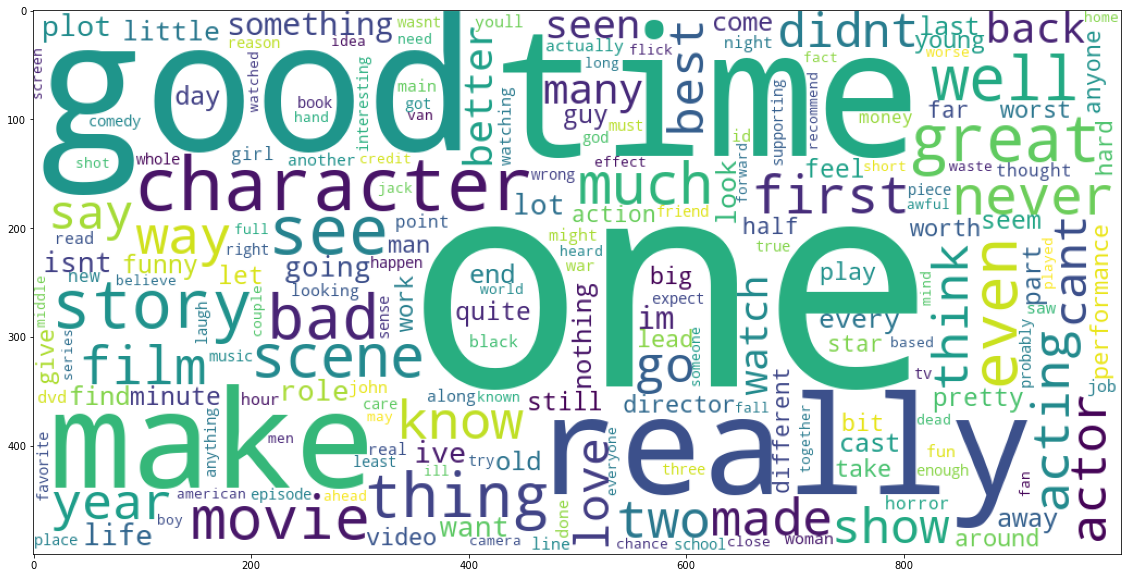

In [17]:
from wordcloud import WordCloud
from matplotlib.pyplot import imshow, figure
figure(figsize=(20,10))
word_cloud = ""
for word in range(len(vocab)):
    word_cloud+=" "+vocab[word]
    # print(word_cloud)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
imshow(wordcloud)

In [18]:
from sklearn.preprocessing import LabelEncoder

df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])

# 0 = negative, 1 = positive

## Transforming test data

In [19]:
# Loading test data
ndf = pd.concat([X_test,y_test],axis=1)

ndf.reset_index(drop=True, inplace=True)

reviews_test, sentiment_test = ndf['review'], ndf['sentiment']


# Clean test reviews
num_reviews = reviews_test.shape[0]
clean_test_reviews = []
for i in range(0, num_reviews):
    # give a progress bar
    if((i+1)%500 == 0):
        print("Review %d of %d\n" % (i+1, num_reviews))
    
    # Call our function for each one, and add the result to the list of clean reviews
    clean_test_reviews.append(review_to_word(reviews_test[i],remove_stopwords=True))
    

sentiment_test = [ 1 if x=='positive' else 0 for x in sentiment_test]



test_reviews = vectorizer.transform(clean_test_reviews)
test_reviews = test_reviews.toarray()


Review 500 of 2000

Review 1000 of 2000

Review 1500 of 2000

Review 2000 of 2000



# Classification using different classifiers


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# 1. Naive Bayes
print("Naive Bayes")

# Initialize MultinoialNB
MultiNB = MultinomialNB(fit_prior=False,class_prior=None,alpha=0.5)
# Fit the MultiNB model to the training data, using 
# bag of words as features and sentiment labels as response variable
model = MultiNB.fit(train_data_features, df['sentiment'])

# Predict the sentiment labels for test data
predictions = MultiNB.predict(test_reviews)


Naive Bayes


In [22]:
# Result
print(classification_report(sentiment_test, predictions))

cm = confusion_matrix(sentiment_test, predictions)
df_cm = pd.DataFrame(cm, index=['TP','FP'],columns=['FN', 'TN'])
df_cm.head()

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       991
           1       0.85      0.84      0.84      1009

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



,FN,TN
TP,836,155
FP,158,851


In [23]:
# 2. Random Forest
print("Random Forest")

# Initialize Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 200, random_state=1)

# Fit the forest to the training set, using the bag of words as
# features and sentiment as the response variable
model = forest.fit(train_data_features, df['sentiment'])

predictions = forest.predict(test_reviews)


Random Forest


In [24]:
# Result
print(classification_report(sentiment_test, predictions))

cm = confusion_matrix(sentiment_test, predictions)
df_cm = pd.DataFrame(cm, index=['TP','FP'],columns=['FN', 'TN'])
df_cm.head()

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       991
           1       0.82      0.86      0.84      1009

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



,FN,TN
TP,804,187
FP,139,870


In [25]:
# 3. Support Vector Machine
print("Support Vector Machine")

# Initialize SVM
SVM = SVC(kernel='linear', C=1, gamma='auto')
# Fit the SVM model to the training data
model = SVM.fit(train_data_features, df['sentiment'])

predictions = SVM.predict(test_reviews)

Support Vector Machine


In [26]:
# Result
print(classification_report(sentiment_test, predictions))

cm = confusion_matrix(sentiment_test, predictions)
df_cm = pd.DataFrame(cm, index=['TP','FP'],columns=['FN', 'TN'])
df_cm.head()

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       991
           1       0.80      0.86      0.83      1009

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



,FN,TN
TP,780,211
FP,139,870


In [27]:
# 4. K Nearest Neighbors
print("K Nearest Neighbors")

# Initialize KNN
knn = KNeighborsClassifier(weights='distance',p=2,n_neighbors=100,leaf_size=0,algorithm='brute')

# Fit the KNN model to the training data
KNearestNeighbor = knn.fit(train_data_features, df['sentiment'])

predictions = KNearestNeighbor.predict(test_reviews)

K Nearest Neighbors


In [28]:
# Result
print(classification_report(sentiment_test, predictions))

cm = confusion_matrix(sentiment_test, predictions)
df_cm = pd.DataFrame(cm, index=['TP','FP'],columns=['FN', 'TN'])
df_cm.head()

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       991
           1       0.70      0.80      0.75      1009

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000



,FN,TN
TP,637,354
FP,197,812


# Results


|Classifer |Accuracy | Sentiment | Precision | Recall | F1-score |
| :--- | :---: | :---: | :---: | :---: | :---: |
| NB (Naive Bayes)             | 0.84 | 0 | 0.84 | 0.84 | 0.84 |
|                               |      | 1 | 0.85 | 0.84 | 0.84 | 
| RF (Random Forest)            | 0.84 | 0 | 0.85 | 0.81 | 0.83 |
|                               |      | 1 | 0.82 | 0.86 | 0.84 |
| SVM (Support Vector Machine)  | 0.82 | 0 | 0.85 | 0.79 | 0.82 |
|                               |      | 1 | 0.80 | 0.86 | 0.83 |
| KNN (K-Nearest Neighbors)     | 0.72 | 0 | 0.76 | 0.64 | 0.70 |
|                               |      | 1 | 0.76 | 0.80 | 0.75 |


Both Naive Bayes and Random Forest performed better than the others classifiers with accuracy of 0.84. Further their f1-score is 0.84 and 0.835 respectively. And going by f1-Score, Naive-Bayes is best performing classifier.

### Custom Test : Testing review on best performing classifier (Naive Bayes)

In [29]:
# Loading test data
df = pd.concat([X_test,y_test],axis=1)
df.reset_index(drop=True, inplace=True)

reviews_test, sentiment_test = df['review'], df['sentiment']
sentiment_test = [ 1 if x=='positive' else 0 for x in sentiment_test]

In [30]:
tags = ["Negative","Positive"]

In [31]:
# negative review
print("Review : \n",reviews_test[3],"\n\n")
print("Review is",tags[sentiment_test[3]])

Review : 
 Well,this movie is really "PLUMPED" HAHA Get it? Thats kinda like the attitude of this movie. The plot is just a copy of Pulp Fiction,okay thats acceptable,but to make this piece if "PLUMP" (haha)! is really unbelievable.The storyline is so pathetic,and the whole thing only gathered a few laughs. It did try making a few jokes from various other movies,and it failed most of the times. I mean,i do have a sense of humor,but this isnt really the way to go to get a laugh. Most of the supposedly "Funny" moments are completely ironic. The film is quiet short running at around 75 minutes overall. They could have done a much funnier job,seeming they made fun of a blockbuster film,they were gambling,and hey! I think they lost!<br /><br />In overall PLUMP Fiction,is "PLUMPABLE" but you wont gather much at all!<br /><br />Worth watching over and over again?: No once is enough,actually its more than enough!<br /><br />So is it worth the rent? Ummm..As I said,Its "PLUMPABLE",but you will 

In [32]:
# positive review
print("Review : \n",reviews_test[2],"\n\n")
print("Review is",tags[sentiment_test[2]])

Review : 
 This film was amazing. It had an original concept (that of a vampire movie meets Yakuza mob film). It is a humorous and yet highly dramatic and tragic movie about friendship, love, immortality, death, and happiness, and comments subtelly on society. On the part of Gackt Camui, the role of Sho was excellently delivered, and HYDE was surprisingly good for his first film as the tortured yet humorous vampire, Kei. I also laughed and cried at the happy-go-lucky character, Toshi, who grew up with Sho. I loved each and every second of this this film, especially moments such as the funny Cigarette scene, the fighting scenes, and most of all, the heartrenching ending. 


Review is Positive


In [33]:
# Lets see if Model detects the same
# for index 2 and 3
# index 2 is positive
# index 3 is negative

# transform the test review
clean_test_reviews = []
clean_test_reviews.append(review_to_word(reviews_test[3],remove_stopwords=True))
clean_test_reviews.append(review_to_word(reviews_test[2],remove_stopwords=True))

test_review = vectorizer.transform(clean_test_reviews)
test_review = test_review.toarray()

In [34]:
# using Naive-Bayes classifier
# predicting first negative then positive review

prediction = MultiNB.predict(test_review)

print("Review is",tags[prediction[0]])
print("Review is",tags[prediction[1]])

Review is Negative
Review is Positive


In [35]:
# custom testing
# taking review from the user
review = input()
review

Zack snyder's justice league is far better than theatrical cut, in every way you can think of, steppenwolf is an actual threat now, his cgi is great, he has a clear goal, but cyborg is the heart of the movie and one of the best characters, Snyder did each hero justice, and flash powers are incredible and mind-blowing, Wonder woman is nothing like what we've seen in ww84, she is a valiant warrior and badass character, I really liked how they portrayed darkseid and paved the way for a potential JL2, he is an absolute great villain, and junkie xl music is really epic and great, overall 9/10 for this movie, I just had one problem with it: too much slow-motions NOW, it's time to RESTORE THE SNYDERVERSE


"Zack snyder's justice league is far better than theatrical cut, in every way you can think of, steppenwolf is an actual threat now, his cgi is great, he has a clear goal, but cyborg is the heart of the movie and one of the best characters, Snyder did each hero justice, and flash powers are incredible and mind-blowing, Wonder woman is nothing like what we've seen in ww84, she is a valiant warrior and badass character, I really liked how they portrayed darkseid and paved the way for a potential JL2, he is an absolute great villain, and junkie xl music is really epic and great, overall 9/10 for this movie, I just had one problem with it: too much slow-motions NOW, it's time to RESTORE THE SNYDERVERSE"

In [36]:
# cleaning the review
clean_review = []
clean_review.append(review_to_word(review,remove_stopwords=True))
clean_review = vectorizer.transform(clean_review)
clean_review = clean_review.toarray()

# predicting
pred = MultiNB.predict(clean_review)

print("Review is",tags[pred[0]])

Review is Positive


In [37]:
# another test
def movie_sentiment():
    review = input()
    clean_review = []
    clean_review.append(review_to_word(review,remove_stopwords=True))
    clean_review = vectorizer.transform(clean_review)
    clean_review = clean_review.toarray()

    # predicting
    pred = MultiNB.predict(clean_review)
    print("\nReview is",tags[pred[0]])

movie_sentiment()

 Sidharth Malhotra and Kiara Advani nailed it with their performance. This movie truly portrays the jolly nature of Sir Vikram Batra . Those have given 1 star to this movie are the ones who gave 10 stars to movie like radhe , Tubelight etc LOL . Dont listen to them and just watch it , you will not regret .  Acting of Sidharth is way way better than other bollywood actors . Just loved his performance in this movie. He couldn't have done better . Same goes to Kiara Advani , simply amazing .  Kudos to the crew and actors who worked in this film and gave justice to the personality of Sir Vikram Batra JUST WATCH IT WITHOUT ANY DOUBT.

Review is Positive


In [38]:
# saving Model
import pickle
pickle.dump(MultiNB, open('model.pkl',"wb"))